# Case study on Unsupervised Learning

## (1) Read the dataset to the python environment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Desktop\ICTK\Case Study #09 - Unsupervised Learning\Wine Dataset.csv')

### Exploratory Data Analysis(EDA)

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

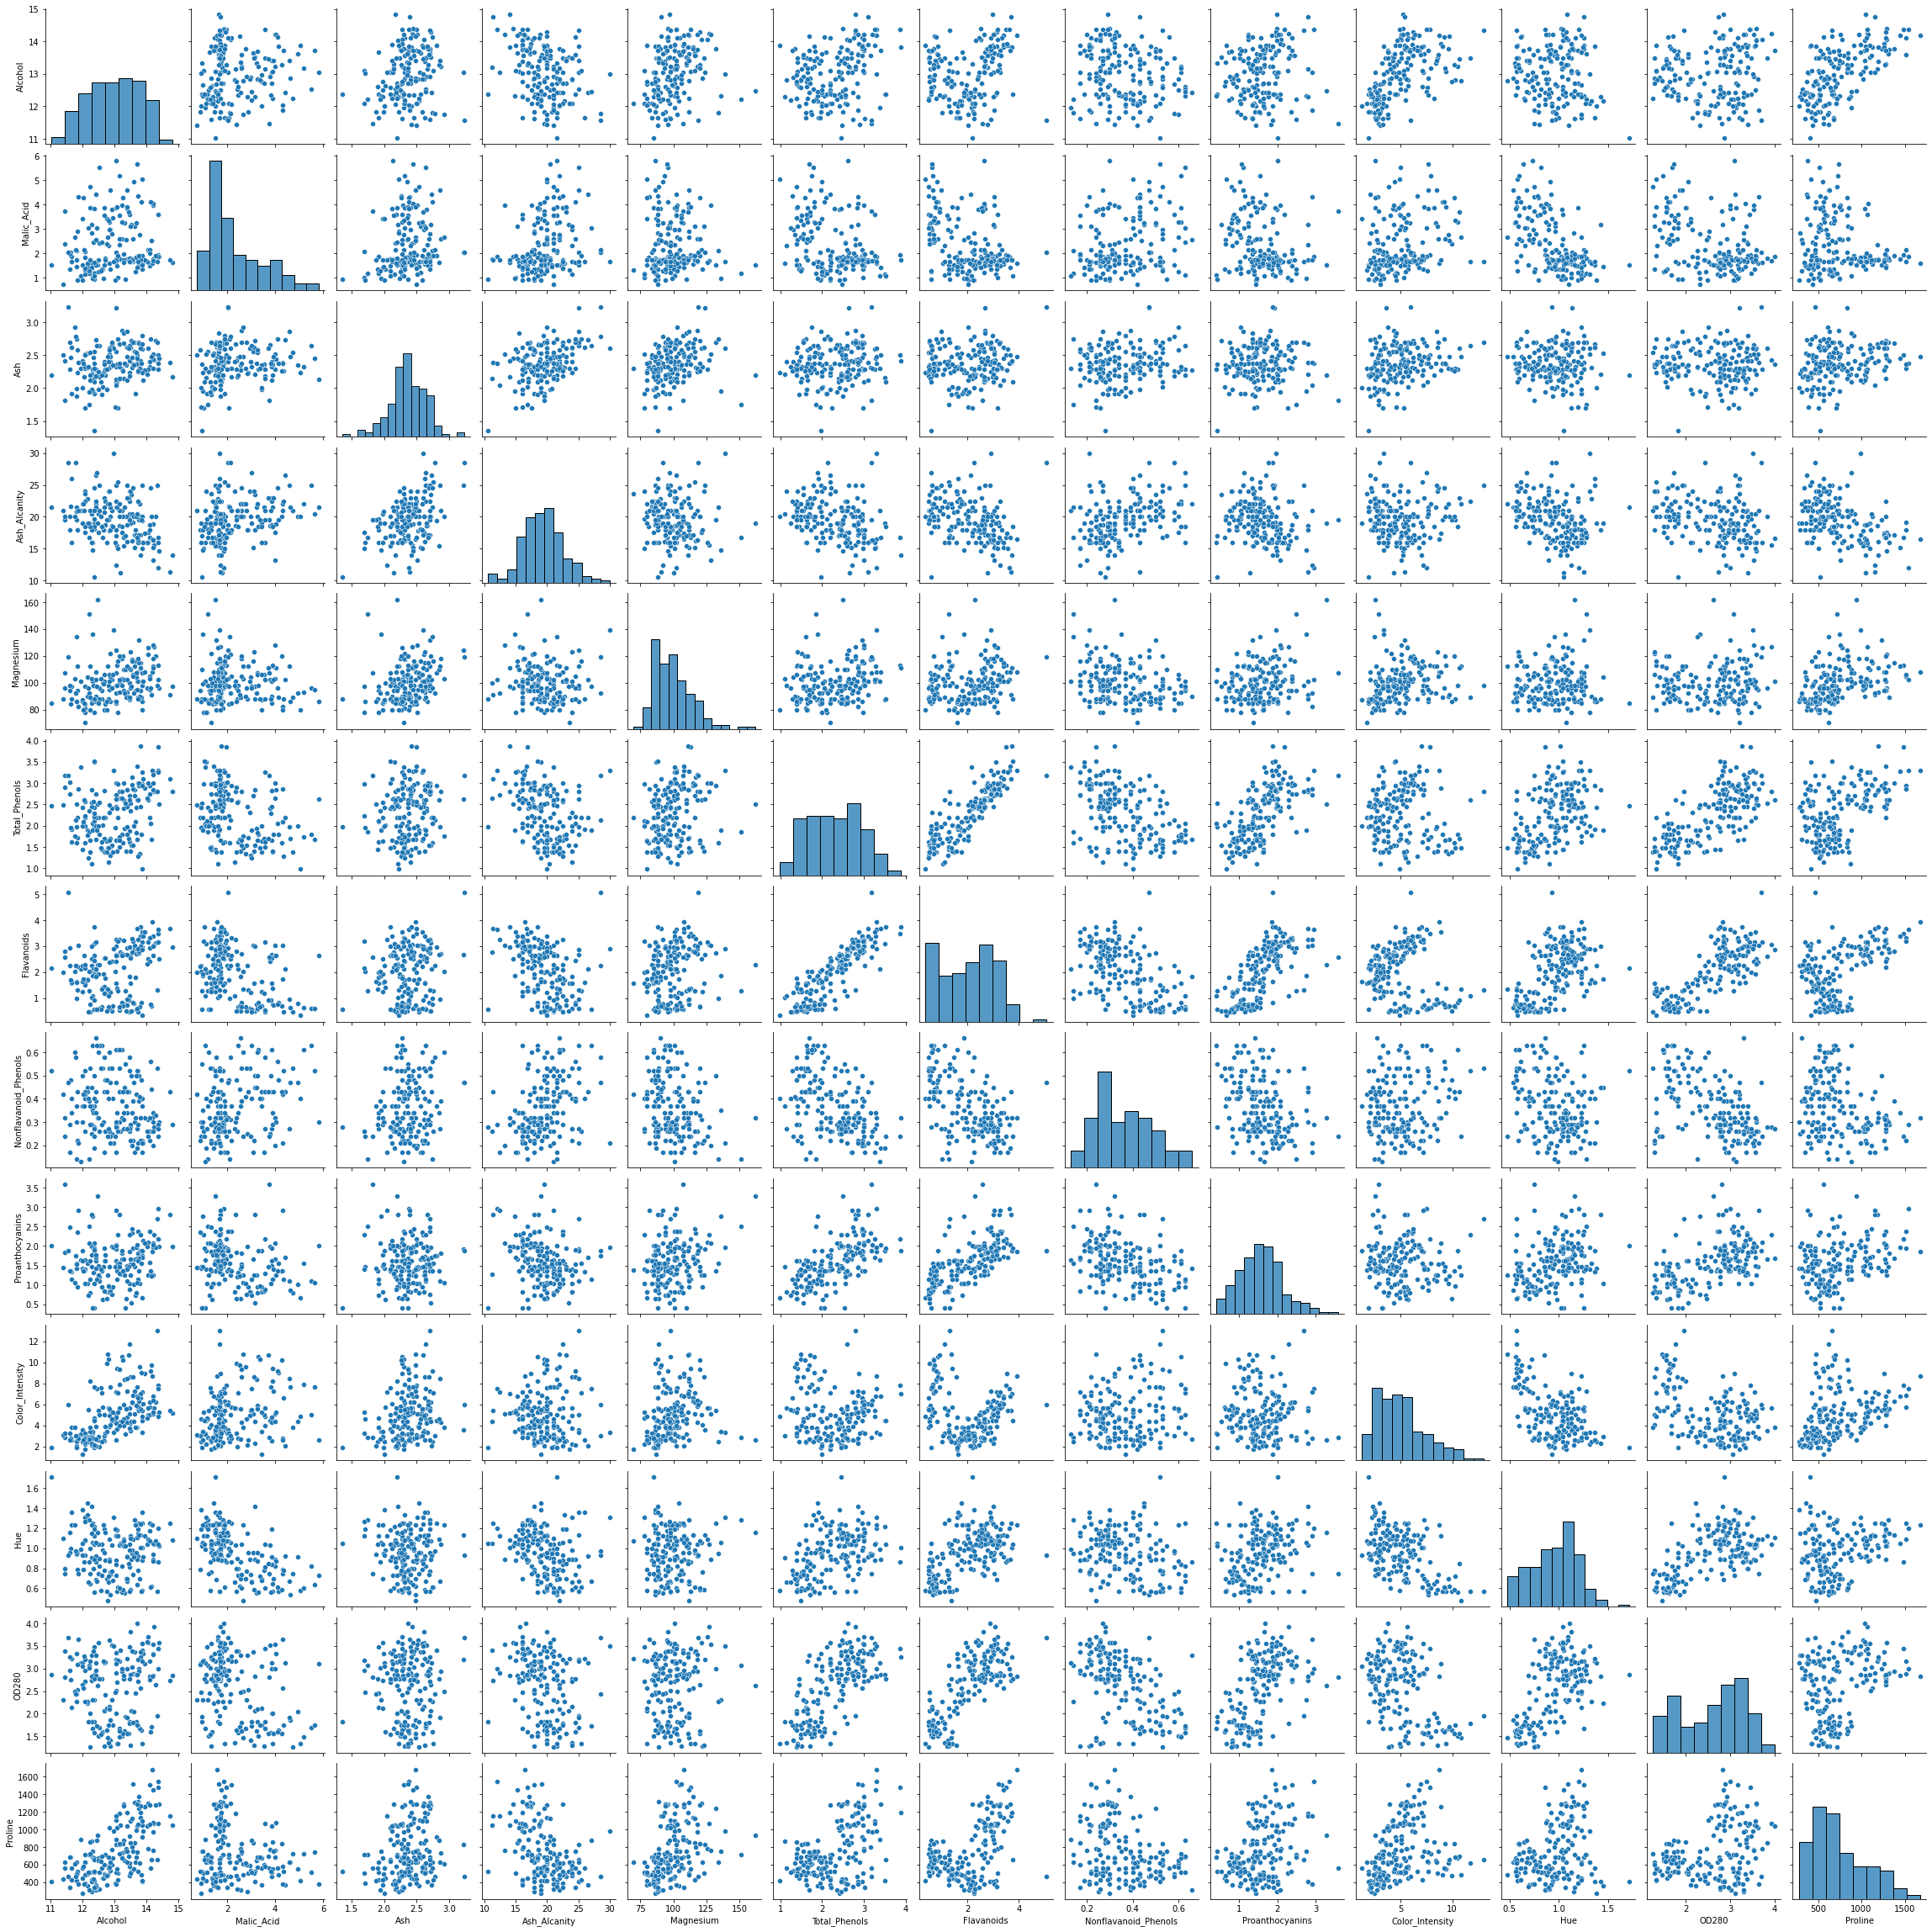

In [6]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

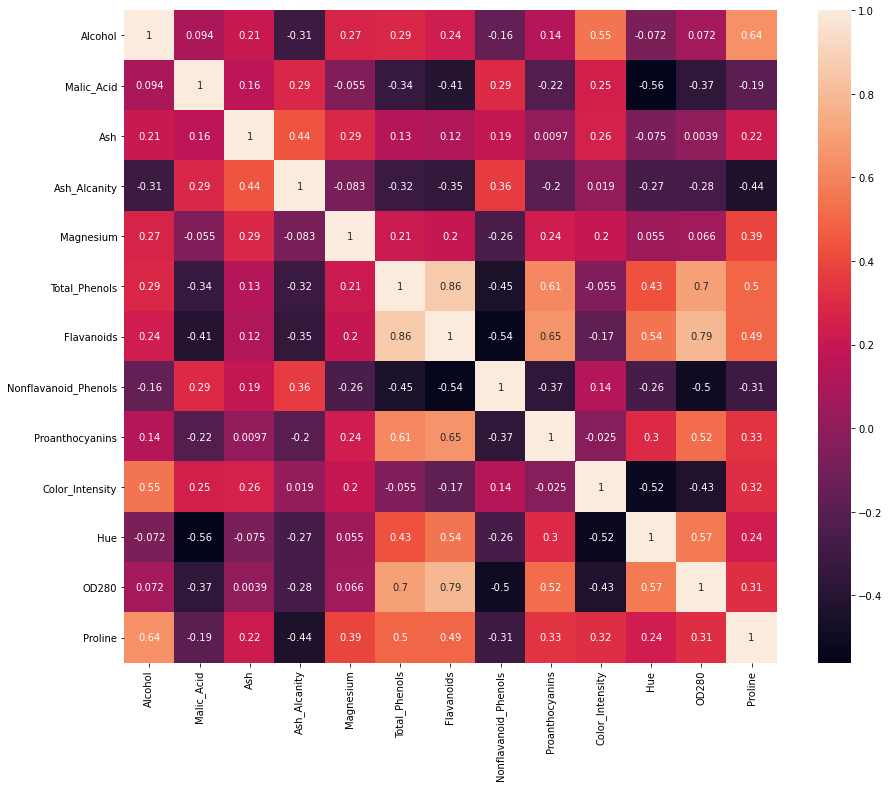

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,square=True)

### Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x=pd.DataFrame(x)

### Handling Outliers

In [9]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x202bbd5ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x202bbd6a3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bbd5e940>,
 'medians': [<matplotlib.lines.Line2D at 0x202bbd6aa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x202bbd6adf0>,
 'means': []}

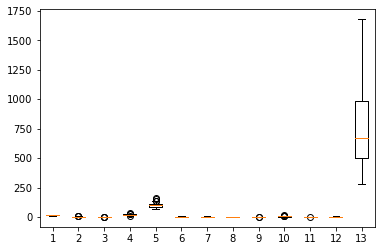

In [10]:
plt.boxplot(df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280','Proline']])

{'whiskers': [<matplotlib.lines.Line2D at 0x202bbe7f9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x202bbe8d0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bbe7f640>],
 'medians': [<matplotlib.lines.Line2D at 0x202bbe8d760>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bbe8dac0>],
 'means': []}

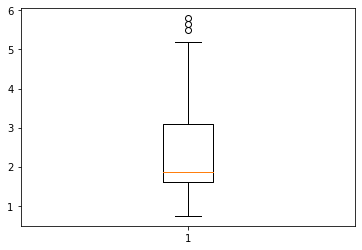

In [11]:
plt.boxplot(df[['Malic_Acid']])

In [12]:
Q1=np.percentile(df['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(df['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(df['Malic_Acid'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.605
1.8650000000000002
3.065
-0.585
5.255


In [13]:
outlier=[]
for x in df['Malic_Acid']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[5.8, 5.51, 5.65]

In [14]:
ind1=df['Malic_Acid']>up_lim
df.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [15]:
df.drop([123, 137, 173],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bbedcd90>,
 'caps': [<matplotlib.lines.Line2D at 0x202bbee8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bbedca30>],
 'medians': [<matplotlib.lines.Line2D at 0x202bbee8b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bbee8eb0>],
 'means': []}

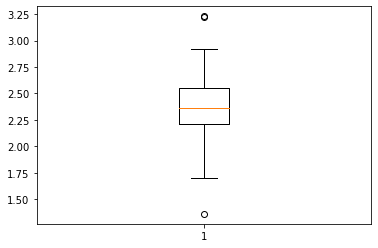

In [16]:
plt.boxplot(df[[ 'Ash']])

In [17]:
Q1=np.percentile(df['Ash'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.21
2.36
2.5549999999999997
1.6925000000000003
3.0724999999999993


In [18]:
outlier=[]
for x in df['Ash']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[3.22, 1.36, 3.23]

In [19]:
ind1=df['Ash']>up_lim
df.loc[ind1].index

Int64Index([25, 121], dtype='int64')

In [20]:
ind=df['Ash']<low_lim
df.loc[ind].index

Int64Index([59], dtype='int64')

In [21]:
df.drop([25,121,59],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bbf48790>,
 'caps': [<matplotlib.lines.Line2D at 0x202bbf48e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bbf48430>],
 'medians': [<matplotlib.lines.Line2D at 0x202bbf55550>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bbf558b0>],
 'means': []}

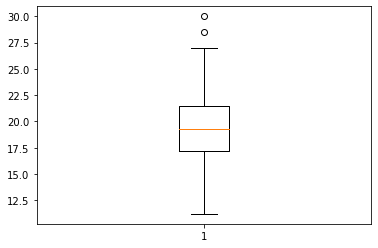

In [22]:
plt.boxplot(df[[ 'Ash_Alcanity']])

In [23]:
Q1=np.percentile(df['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash_Alcanity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

17.15
19.25
21.5
10.624999999999996
28.025000000000002


In [24]:
ind1=df['Ash_Alcanity']>up_lim
df.loc[ind1].index

Int64Index([73, 127], dtype='int64')

In [25]:
df.drop([73, 127],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bbfb03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x202bbfb0a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bbfa2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x202bbfbb160>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bbfbb4c0>],
 'means': []}

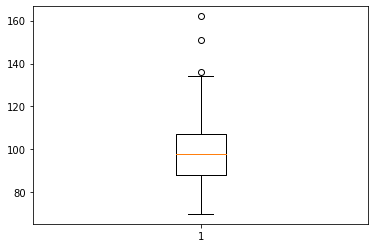

In [26]:
plt.boxplot(df[[ 'Magnesium']])

In [27]:
Q1=np.percentile(df['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(df['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(df['Magnesium'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

88.0
98.0
107.0
59.5
135.5


In [28]:
ind1=df['Magnesium']>up_lim
df.loc[ind1].index

Int64Index([69, 78, 95], dtype='int64')

In [29]:
df.drop([69, 78, 95],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bc008820>,
 'caps': [<matplotlib.lines.Line2D at 0x202bc008ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bc008490>],
 'medians': [<matplotlib.lines.Line2D at 0x202bc0145e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bc014940>],
 'means': []}

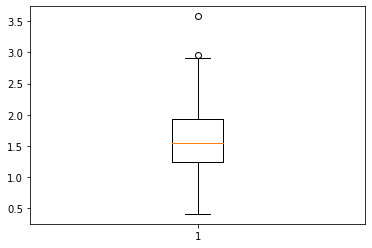

In [30]:
plt.boxplot(df[['Proanthocyanins']])

In [31]:
Q1=np.percentile(df['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(df['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(df['Proanthocyanins'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.25
1.54
1.9249999999999998
0.23750000000000027
2.9374999999999996


In [32]:
ind1=df['Proanthocyanins']>up_lim
df.loc[ind1].index

Int64Index([14, 110], dtype='int64')

In [33]:
df.drop([14, 110],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bc06b760>,
 'caps': [<matplotlib.lines.Line2D at 0x202bc06be20>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bc06b400>],
 'medians': [<matplotlib.lines.Line2D at 0x202bc077520>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bc077880>],
 'means': []}

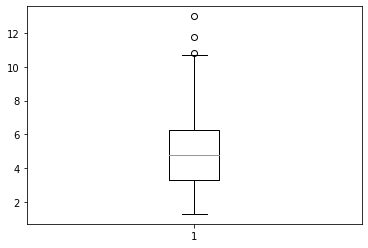

In [34]:
plt.boxplot(df[['Color_Intensity']])

In [35]:
Q1=np.percentile(df['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(df['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(df['Color_Intensity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

3.27
4.8
6.25
-1.1999999999999997
10.719999999999999


In [36]:
ind1=df['Color_Intensity']>up_lim
df.loc[ind1].index

Int64Index([151, 158, 159], dtype='int64')

In [37]:
df.drop([151, 158, 159],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202bc0d1160>,
 'caps': [<matplotlib.lines.Line2D at 0x202bc0d1820>,
 'boxes': [<matplotlib.lines.Line2D at 0x202bc0c1d90>],
 'medians': [<matplotlib.lines.Line2D at 0x202bc0d1ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202bc0de280>],
 'means': []}

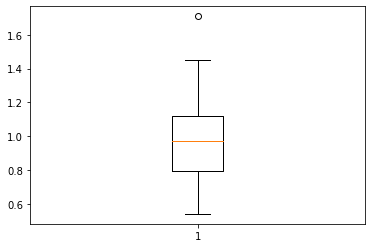

In [38]:
plt.boxplot(df[['Hue']])

In [39]:
Q1=np.percentile(df['Hue'],25,interpolation='midpoint')
Q2=np.percentile(df['Hue'],50,interpolation='midpoint')
Q3=np.percentile(df['Hue'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.795
0.97
1.12
0.30749999999999994
1.6075000000000002


In [40]:
ind1=df['Hue']>up_lim
df.loc[ind1].index

Int64Index([115], dtype='int64')

In [41]:
ind1=df['Hue']>up_lim
df.loc[ind1].index

Int64Index([115], dtype='int64')

#### Insights

Outliers from the dataset are removed. 

## (2) Try out different clustering models in the wine dataset.

### Hierarchial Clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(df)
labels_hc

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 0, 0, 0, 3,
       3, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 4, 2, 4, 4, 0, 2, 2, 0,
       0, 4, 2, 0, 4, 4, 2, 4, 4, 0, 2, 2, 2, 4, 2, 2, 0, 2, 2, 4, 2, 4,
       4, 2, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0, 4, 2, 4, 4, 4, 2, 4,
       4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 0, 4, 2, 0, 2, 2, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 2], dtype=int64)

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

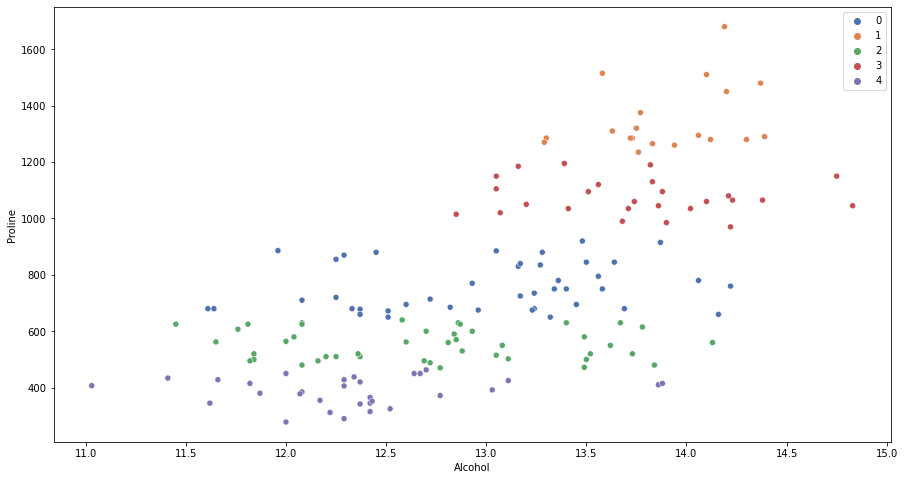

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_hc,palette="deep")

### KMeans

In [44]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([2, 2, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 2, 1, 1, 2, 1, 2, 4, 4, 2, 2, 4, 4, 2, 2, 0, 4, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 3, 0, 3, 3, 0, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0,
       4, 4, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0, 3, 0, 0, 4,
       0, 3, 3, 0, 4, 4, 4, 0])

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

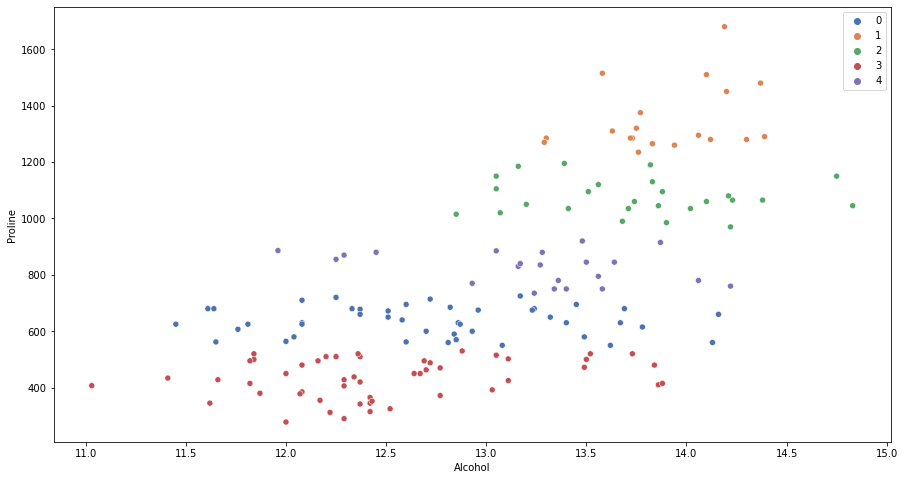

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_kmean,palette="deep")

## (3) Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### Hierarchial Clustering

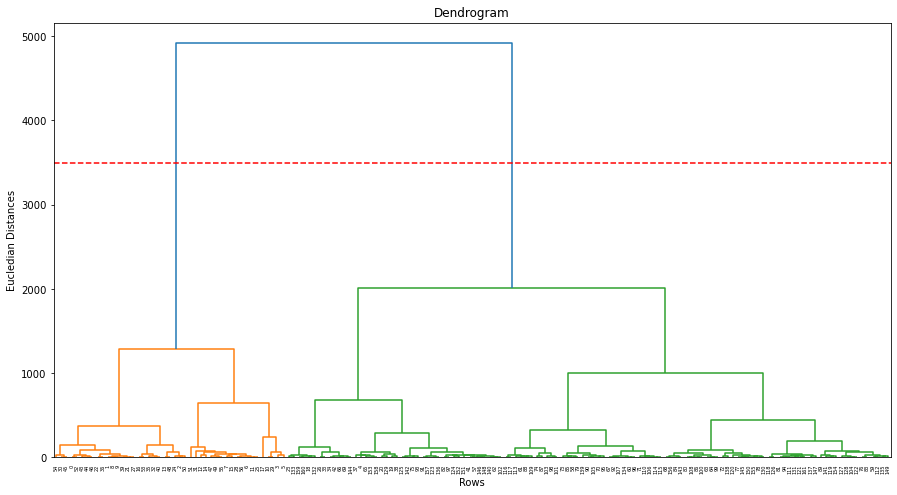

In [46]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Rows')
plt.hlines(3500,0,5000,colors='red',linestyles='dashed')
plt.ylabel('Eucledian Distances')
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(df)
labels_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

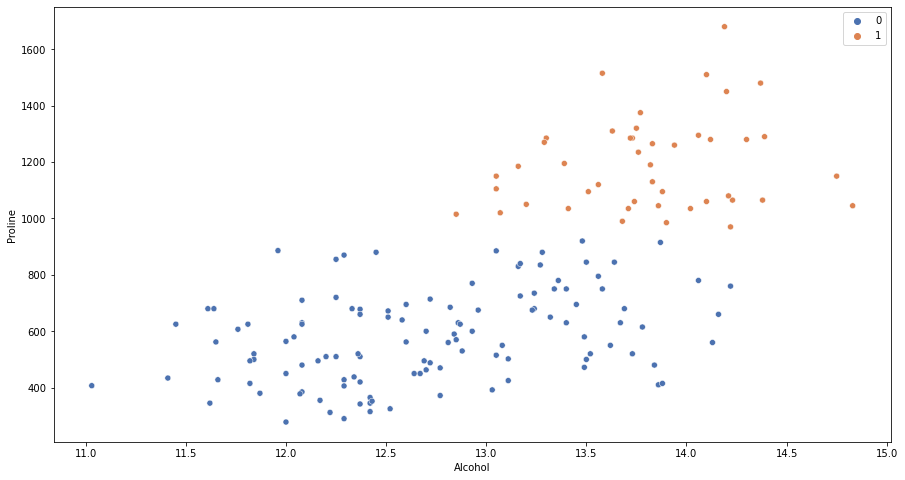

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_hc,palette="deep")

### KMeans

In [49]:
from sklearn.cluster import KMeans
ks=range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


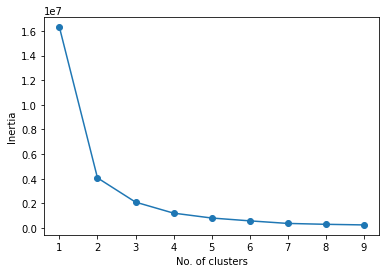

In [50]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

In [51]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2])

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

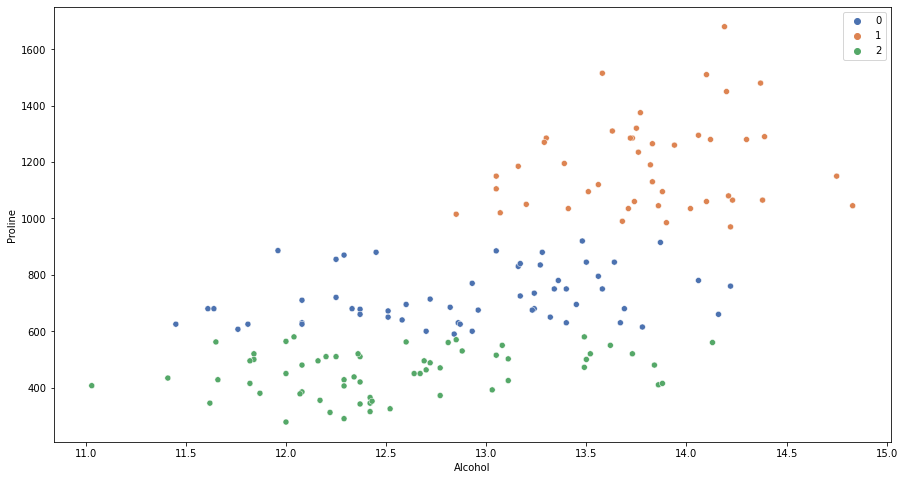

In [52]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_kmean,palette="deep")

## Principal Component Analysis(PCA)

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PCA_df=pd.DataFrame(pca.fit_transform(df),columns=['P1','P2'])
PCA_df

,P1,P2
0,313.795418,22.863420
1,298.332544,-3.940404
2,433.298581,-5.192319
3,728.476725,1.630244
4,-16.337600,19.755822
...,...,...
157,-91.789262,-5.629252
158,-1.631128,3.700609
159,83.692783,20.258458
160,88.690648,20.108484


In [54]:
PCA_df['cluster_km']=labels_kmean
PCA_df['cluster_hc']=labels_hc
PCA_df

,P1,P2,cluster_km,cluster_hc
0,313.795418,22.863420,1,1
1,298.332544,-3.940404,1,1
2,433.298581,-5.192319,1,1
3,728.476725,1.630244,1,1
4,-16.337600,19.755822,0,0
...,...,...,...,...
157,-91.789262,-5.629252,0,0
158,-1.631128,3.700609,0,0
159,83.692783,20.258458,0,0
160,88.690648,20.108484,0,0


In [55]:
red_centers_km=pca.transform(model_kmeans.cluster_centers_)
red_centers_km

array([[ -28.55706606,    3.2666364 ],
       [ 440.37374958,   -1.49188002],
       [-298.64955789,   -1.89831209]])

### KMeans PCA plot P1 vs P2

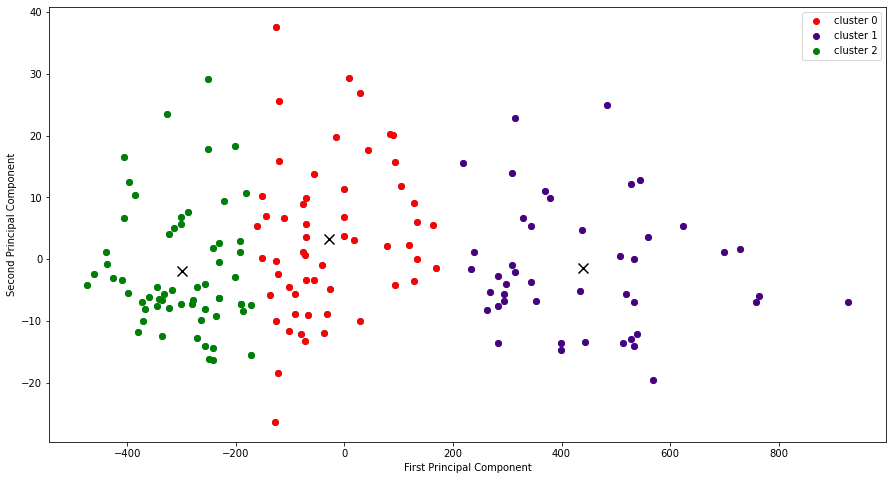

In [56]:
plt.figure(figsize=(15,8))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_km']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_km']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==1].loc[:,'P2'],color='indigo',label='cluster 1')
plt.scatter(PCA_df[PCA_df['cluster_km']==2].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==2].loc[:,'P2'],color='green',label='cluster 2')

plt.scatter(red_centers_km[:,0],red_centers_km[:,1],color='black',marker='x',s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

### Hierarchial Clustering plot P1 vs P2

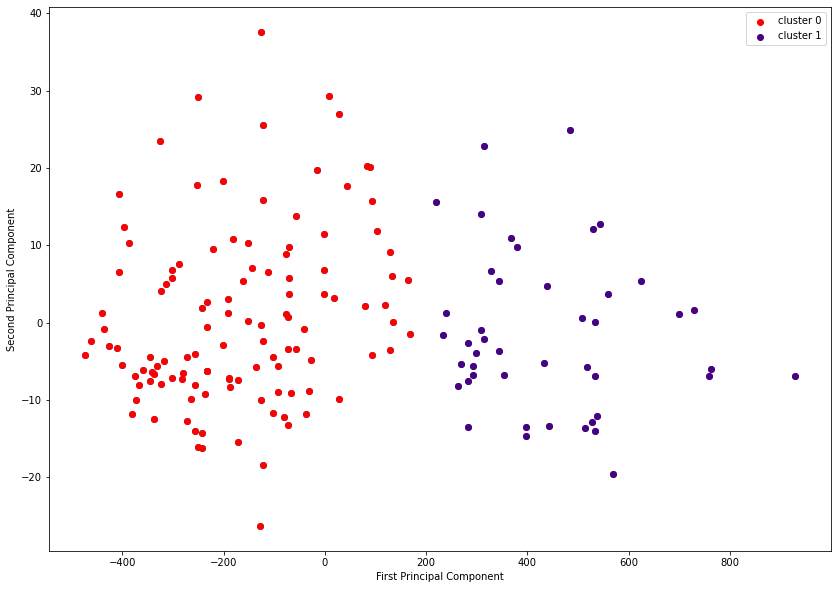

In [57]:
plt.figure(figsize=(14,10))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_hc']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_hc']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==1].loc[:,'P2'],color='indigo',label='cluster 1')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

### Insights

Through PCA and plots it is clear that the models are clustered into 3 and 2 clusters in KMeans and Hierarchial Clustering respectively. Therefore there are 3 category of wines with KMeans model and 2 category of wines with Hierarchial Clustering model.